# Seq len

if set longer seq len for model, would it be more accurate for large cells?

In [1]:
len2path = {80:"./all_bmd_0/graphs_0.txt",
           120:"./all_bmd_1/graphs_0.txt"}

In [2]:
import json

In [3]:
len2graphs = {}
for l in len2path:
    len2graphs[l]=[]
    with open(len2path[l],'r') as f:
        for line in f:
            len2graphs[l].append(json.loads(line))

In [10]:
len2graphs[80][0]["new_nodes"]

['Module',
 'Assign',
 'x',
 '0',
 'ListComp',
 'SubscriptLoad',
 'x',
 'Index',
 '0',
 'comprehension',
 'x',
 'train',
 'Assign',
 'x',
 '1',
 'ListComp',
 'SubscriptLoad',
 'x',
 'Index',
 '1',
 'comprehension',
 'x',
 'train',
 'Assign',
 'colors',
 'ListComp',
 'Call',
 'AttributeLoad',
 'cm',
 'jet',
 'BinOpDiv',
 'y',
 'Call',
 'max',
 'y',
 'train',
 'comprehension',
 'y',
 'train',
 'label',
 'Expr',
 'Call',
 'AttributeLoad',
 'plt',
 'figure',
 'figsize',
 'TupleLoad',
 '10',
 '7',
 'Assign',
 'ax',
 'Call',
 'AttributeLoad',
 'plt',
 'axes',
 'frameon',
 'NameConstant',
 'Expr',
 'Call',
 'AttributeLoad',
 'plt',
 'scatter',
 'x',
 '0',
 'x',
 '1',
 'c',
 'colors',
 'edgecolor',
 'none',
 's',
 '5',
 'Expr',
 'Call',
 'AttributeLoad',
 'plt',
 'xlabel',
 'x',
 '0',
 'Expr',
 'Call',
 'AttributeLoad',
 'plt',
 'ylabel',
 'x',
 '1',
 'Expr',
 'Call',
 'AttributeLoad',
 'plt',
 'title',
 'PCA',
 'embedding',
 'to',
 '2',
 'dimensional',
 'space']

In [110]:
def len_graph(graph):
#     return len(graph["new_nodes"])
#     return len(graph["nodes"])
    return len(graph["new_nodes"])+len([t for t in (' '.join(graph["annotation"])).split() if t])

In [70]:
lens = [len_graph(g) for g in len2graphs[80]]

In [72]:
min(lens)

3

In [71]:
max(lens)

1718

In [75]:
len([l for l in lens if l>150])

104

In [76]:
104/1718

0.06053550640279395

In [16]:
import numpy as np

In [17]:
lens = np.array(lens)

In [18]:
from matplotlib import pyplot as plt 

In [19]:
%matplotlib inline

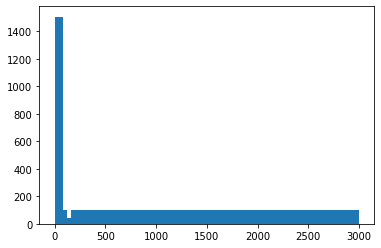

In [73]:
# np.histogram(a,bins =  [0,20,40,60,80,100])
plt.hist(lens, bins =  [0,80,120,160,3000]) 
plt.show()

In [64]:
graphs_1 = [g for g in  len2graphs[80] if len_graph(g)<80]
graphs_2 = [g for g in  len2graphs[80] if len_graph(g)>=80 and  len_graph(g)<120]
graphs_3 = [g for g in  len2graphs[80] if len_graph(g)>=120 and len_graph(g)<160]
graphs_4 = [g for g in  len2graphs[80] if len_graph(g)>=160]

counter=0
for g in graphs_1:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_1))


counter=0
for g in graphs_2:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_2))


counter=0
for g in graphs_3:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_3))


counter=0
for g in graphs_4:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_4))


0.6268768768768769
0.5088757396449705
0.4090909090909091
0.5056179775280899


In [65]:

graphs_1 = [g for g in  len2graphs[120] if len_graph(g)<80]
graphs_2 = [g for g in  len2graphs[120] if len_graph(g)>=80 and  len_graph(g)<120]
graphs_3 = [g for g in  len2graphs[120] if len_graph(g)>=120 and len_graph(g)<160]
graphs_4 = [g for g in  len2graphs[120] if len_graph(g)>=160]

counter=0
for g in graphs_1:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_1))


counter=0
for g in graphs_2:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_2))


counter=0
for g in graphs_3:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_3))


counter=0
for g in graphs_4:
    if int(g["stage"]) ==g["pred"]:
        counter+=1
print(counter/len(graphs_4))


0.6936936936936937
0.5621301775147929
0.48484848484848486
0.5280898876404494


In [66]:
x = [1,2,3,4]



y1 = np.array([0.6269,0.5089, 0.4091, 0.5056])
y2 = np.array([0.6937-0.6269,0.5621-0.5089, 0.4848-0.4091, 0.5281-0.5056])

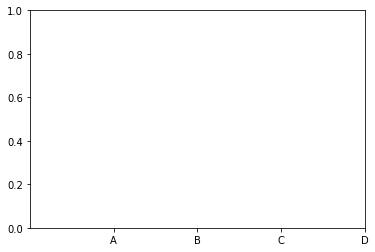

In [30]:
x = [1,2,3,4]

y1 = np.array([0.6237,0.4867, 0.3654, 0.5])
y2 = np.array([0.6889-0.6237, 0.5467-0.4867, 0.4615-0.3654, 0.5075-0.5])

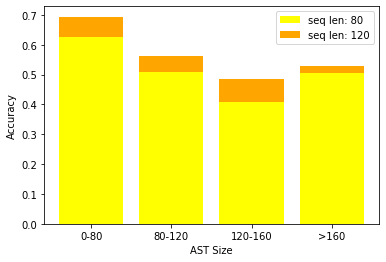

In [67]:
plt.xticks(x,['0-80', '80-120', '120-160', '>160'])
# plt.legend(loc="upper left")
b1 = plt.bar(x, y1, color='yellow', label='80')
b2 = plt.bar(x, y2, bottom=y1, color='orange', label='120')
plt.legend((b1[0], b2[0]), ('seq len: 80', 'seq len: 120'))
plt.xlabel("AST Size")
plt.ylabel("Accuracy")
plt.savefig('a.pdf')

In [77]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [78]:
fmri = sns.load_dataset("fmri")

In [79]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [134]:
graphs = len2graphs[80]
graphs = list(sorted(graphs, key = lambda x: len_graph(x)))
lens = [group_len(len_graph(g)) for g in graphs]

acc = [int(g["stage"])==g["pred"] for g in graphs]

acc = [1 if a else 0 for a in acc]

max_len = [80 for g in graphs]

acc_plot_data = pd.DataFrame(data = {"AST Size":lens, "Accuracy":acc, "Max AST Size":max_len})

In [135]:
graphs = len2graphs[120]
graphs = list(sorted(graphs, key = lambda x: len_graph(x)))

lens = [group_len(len_graph(g)) for g in graphs]

acc = [int(g["stage"])==g["pred"] for g in graphs]

acc = [1 if a else 0 for a in acc]

max_len = [120 for g in graphs]

acc_plot_data_2 = pd.DataFrame(data = {"AST Size":lens, "Accuracy":acc, "Max AST Size":max_len})

In [86]:
import pandas as pd

In [136]:
data = pd.concat([acc_plot_data,acc_plot_data_2])

In [120]:
def group_len(l):
    if l<80:
        return "0-80"
    if l<120:
        return "80-120"
    if l<160:
        return "120-160"
    return ">=160"

In [106]:
lens = [group_len(l) for l in lens]

In [90]:
lens

[120,
 120,
 120,
 80,
 80,
 120,
 80,
 80,
 120,
 80,
 120,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 120,
 120,
 120,
 80,
 120,
 120,
 80,
 80,
 120,
 80,
 80,
 80,
 120,
 120,
 120,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 120,
 80,
 120,
 80,
 80,
 80,
 80,
 120,
 120,
 80,
 120,
 80,
 120,
 120,
 80,
 120,
 80,
 80,
 80,
 80,
 80,
 80,
 120,
 80,
 120,
 80,
 80,
 80,
 120,
 80,
 80,
 120,
 80,
 120,
 80,
 80,
 120,
 120,
 80,
 80,
 80,
 80,
 80,
 120,
 80,
 80,
 80,
 80,
 120,
 120,
 80,
 120,
 80,
 120,
 120,
 80,
 80,
 80,
 120,
 120,
 120,
 80,
 120,
 80,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 80,
 120,
 120,
 120,
 80,
 120,
 120,
 120,
 80,
 80,
 80,
 120,
 120,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,

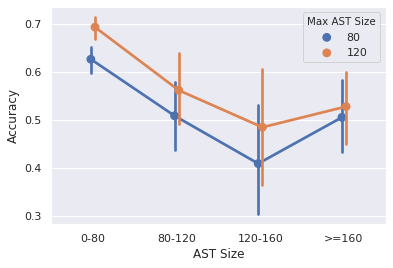

In [137]:
ax = sns.pointplot(x="AST Size", y="Accuracy", hue="Max AST Size", data=data,ci=95, dodge=True)

In [140]:
# ax.savefig("output.png")
fig = ax.get_figure()
fig.savefig('./a.pdf')